In [39]:
import pandas as pd
Codes=pd.read_csv("ATUS_Survey/codes.csv")
Activities=pd.read_csv("ATUS_Survey/atusact.csv")
Summary=pd.read_csv("ATUS_Survey/atussum.csv")
Respondent=pd.read_csv("ATUS_Survey/atusresp.csv")
#print(SU.head(10))
N_people=len(Summary["tucaseid"])  #Initialize all dataframes and store number of people as variable

In [2]:
Roster=pd.read_csv("ATUS_Survey/atusrost.csv")
print(Roster.columns)

Index(['tucaseid', 'tulineno', 'terrp', 'teage', 'tesex'], dtype='object')


In [9]:
print(len(Roster["teage"]))

477138


In [10]:
N_people

170842

In [12]:
import numpy as np
NCIS=np.unique(Activities["tucaseid"])
print(len(NCIS))

170842


In [21]:
def TotalSleep(ID):
    used=(Activities["tucaseid"]==ID) & ((Activities["trcodep"]==10101) | (Activities["trcodep"]==10199))
    return Activities["tuactdur24"][used].sum()
    

In [22]:
print(TotalSleep(NCIS[0]))

870


In [45]:
SleepData=pd.DataFrame()
Sleep=[]
Age=[]
for id in NCIS[0:10]:
    Sleep.append(TotalSleep(id))
    rost=(Roster["tucaseid"]==id) & (Roster["tulineno"]==1) 
    Age.append(Roster["teage"][rost].sum())
    #print(Roster["teage"][rost])
SleepData["Sleep"]=Sleep
SleepData["Age"]=Age
print(SleepData)

In [51]:
import math
IDs=Roster["tucaseid"][Roster["tulineno"]==1]
AgesNaN=Roster["teage"][Roster["tulineno"]==1]
Ages=[x for x in AgesNaN if (math.isnan(x) != True)]
print(Ages[0:10])

[60, 41, 26, 36, 51, 32, 44, 21, 33, 39]


In [56]:
SleepData=pd.DataFrame()
N=10000
Sleep=[0]*N
SubAges=Ages[0:N]

for ind, id in enumerate(IDs[0:N]):
    Sleep[ind]=TotalSleep(id)

SleepData["Sleep"]=Sleep
SleepData["Age"]=SubAges
#print(SleepData)

      Sleep  Age
0       870   60
1       620   41
2       560   26
3       720   36
4       385   51
5       675   32
6       531   44
7       445   21
8       645   33
9       180   39
10      515   26
11      575   33
12      576   42
13      840   17
14      570   32
15      630   45
16      570   59
17      530   28
18      570   50
19      575   17
20      580   47
21      480   39
22      512   23
23      505   18
24      495   25
25      803   21
26      510   48
27      705   58
28      560   59
29      545   27
...     ...  ...
9970    570   18
9971    410   17
9972    480   40
9973    505   17
9974    465   39
9975    570   54
9976    600   31
9977    273   62
9978    520   30
9979    525   21
9980    654   70
9981    420   53
9982    725   80
9983    390   26
9984    578   33
9985    600   58
9986    365   27
9987    480   69
9988    630   34
9989    585   75
9990    360   19
9991    615   35
9992    585   67
9993    540   45
9994    410   28
9995    570   80
9996    450   

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
SleepData["Age"].max()

60

In [28]:
Ages=np.unique(SleepData["Age"])
print(Ages)

In [60]:
SleepData["Sleep"]=SleepData["Sleep"]/60

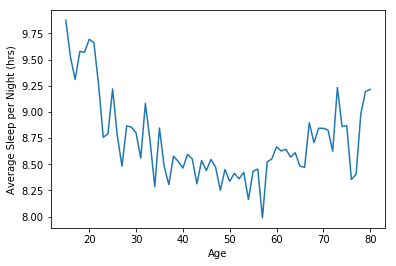

In [63]:
PT=pd.pivot_table(SleepData,index="Age",values="Sleep",aggfunc=np.mean)
plt.plot(PT)
plt.xlabel("Age")
plt.ylabel("Average Sleep per Night (hrs)")
plt.savefig("SleepVsAge.png")
    

Above is a plot of average time spent asleep vs age For the first 10,000 entries.

In [15]:
#The above was too slow to run on all the data, so I found a faster way by saving sleep hours vs caseid as a dict to reference later

import math
SleepDict={} #Tabulate how much sleep each ID got
for ind, row in Activities.iterrows():
    if (row["trcodep"]==10101) | (row["trcodep"]==10199):
        if row["tucaseid"] in SleepDict.keys():
            SleepDict[row["tucaseid"]]+=row["tuactdur24"]
        else:
            SleepDict[row["tucaseid"]]=row["tuactdur24"]
    
    
    

ValueError: cannot copy sequence with size 2 to array axis with dimension 1

(array([   671.,   4380.,  32629.,  81241.,  38267.,  10651.,   1994.,
           504.,    180.,    100.]),
 array([  1.00000000e+00,   1.44500000e+02,   2.88000000e+02,
          4.31500000e+02,   5.75000000e+02,   7.18500000e+02,
          8.62000000e+02,   1.00550000e+03,   1.14900000e+03,
          1.29250000e+03,   1.43600000e+03]),
 <a list of 10 Patch objects>)

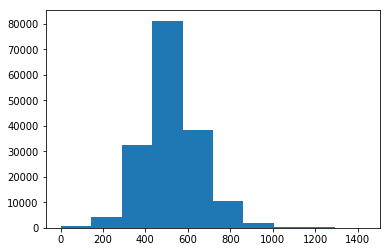

In [16]:
plt.hist(SleepDict.values())

In [14]:
cols=["Age","Sleep"]
A=pd.DataFrame(columns=cols)

A.loc[1]=[5,2]
print(A)

  Age Sleep
1   5     2


In [29]:
cols=["Age","Sleep"]

SleepList=[]
SleepInd=0
#SleepData.loc[1]=[5,2]

for ind, row in Roster.iterrows():
    if (row["tulineno"]==1 and math.isnan(row["teage"]) != True) and row["tucaseid"] in SleepDict.keys():
        SleepList.append([row["teage"],SleepDict[row["tucaseid"]]])
        #SleepData.loc[SleepInd]=[row["teage"],SleepDict[row["tucaseid"]]]
        #SleepInd+=1
SleepData=pd.DataFrame(SleepList,columns=cols)
print(SleepData.head())

   Age  Sleep
0   60    870
1   41    620
2   26    560
3   36    720
4   51    385


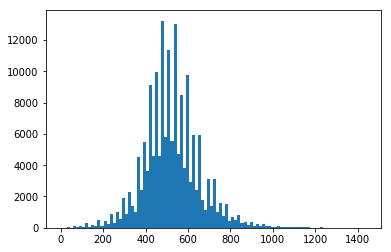

In [33]:
plt.hist(SleepData.Sleep,bins=100)
plt.show()

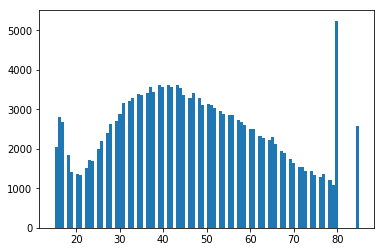

In [34]:
plt.hist(SleepData.Age,bins=100)
plt.show()

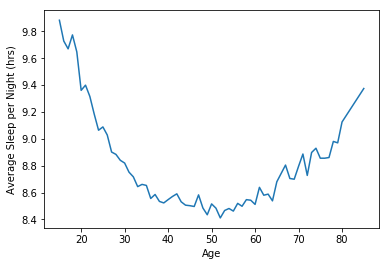

In [38]:
import numpy as np
PT=pd.pivot_table(SleepData,index="Age",values="Sleep",aggfunc=np.mean)
plt.plot(PT/60)
plt.xlabel("Age")
plt.ylabel("Average Sleep per Night (hrs)")
plt.savefig("SleepVsAge_AllData.png")